<a href="https://colab.research.google.com/github/Roll1ngo/Authorization_and_authentication_synopsis/blob/master/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [736]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Готуємо данні до роботи

In [737]:
data_source = pd.read_csv('Housing.csv')
data = data_source.copy()
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(545, 13)
(545, 13)


In [738]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [739]:
print(data.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [740]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [741]:
label_encoders = {}
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
mappings = {}

furnishingstatus_mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}

#Обробляємо категоріальні данні
for column in categorical_columns:
    if column == 'furnishingstatus':
        data[column] = data[column].map(furnishingstatus_mapping)
        mappings[column] = furnishingstatus_mapping
    else:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        mappings[column] = mapping
# Друкуємо маппінг

for column, mapping in mappings.items():
    print(f"Mapping for {column}:")
    for class_value, class_label in mapping.items():
        print(f"{class_value} -> {class_label}")

# Записуємо маппінг до  CSV файлу
mappings_data = pd.DataFrame([
    {'column': col, 'category': k, 'code': v}
    for col, map_dict in mappings.items()
    for k, v in map_dict.items()
])

mappings_data.to_csv('mappings.csv', index=False)

Mapping for mainroad:
no -> 0
yes -> 1
Mapping for guestroom:
no -> 0
yes -> 1
Mapping for basement:
no -> 0
yes -> 1
Mapping for hotwaterheating:
no -> 0
yes -> 1
Mapping for airconditioning:
no -> 0
yes -> 1
Mapping for prefarea:
no -> 0
yes -> 1
Mapping for furnishingstatus:
unfurnished -> 0
semi-furnished -> 1
furnished -> 2


In [742]:
data.dtypes


price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [743]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


## Дивимось на корреляції

area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus    0.304721
Name: price, dtype: float64


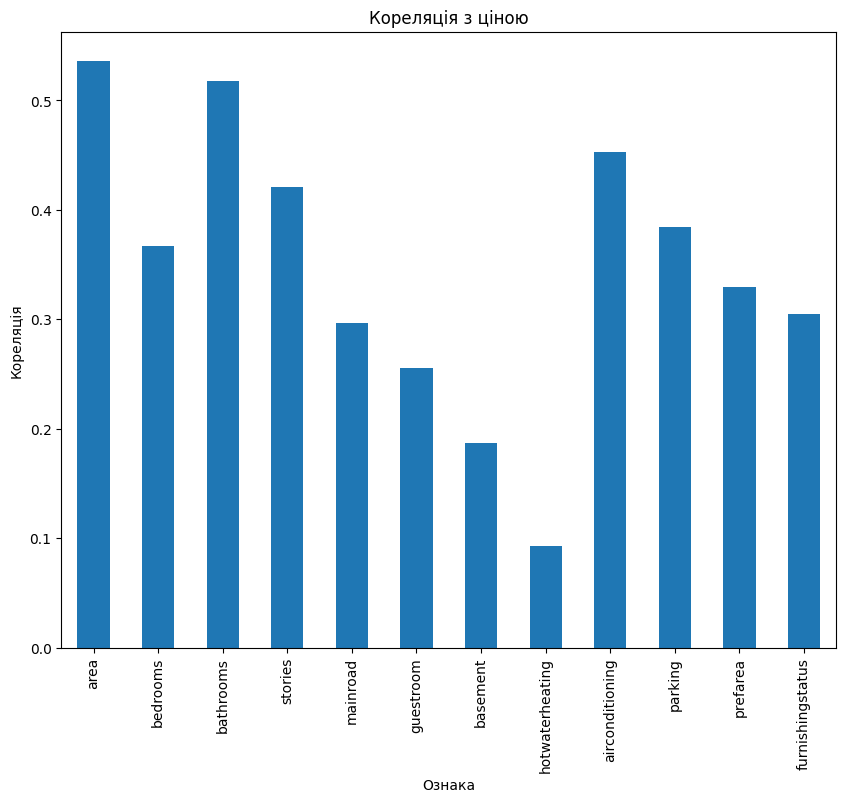

In [744]:
correlation_matrix = data.corr()
correlations_with_price = correlation_matrix['price'].drop('price')
print(correlations_with_price)

correlations_with_price.plot(kind='bar',figsize=(10,8))
plt.title('Кореляція з ціною')
plt.xlabel('Ознака')
plt.ylabel('Кореляція')
plt.show()

In [746]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data['area'].reshape(-1,1)
y = data['price'].reshape(-1,1)

# Розділення даних на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення і навчання моделі лінійної регресії
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = regressor.predict(X_test)

# Виведення прогнозів
print("Прогнозовані значення:", y_pred)
print("Реальні значення:", y_test.values)


AttributeError: 'Series' object has no attribute 'reshape'

## Функція гіпотези лінійної регресії у векторному вигляді

In [ ]:
def h(w_0:pd.Series, w_1:pd.Series, x:pd.Series):
  return np.add(w_0,(np.dot(w_1, x)))



In [ ]:
data.head(2)

## Функція для обчислення функції втрат у векторному вигляді

In [ ]:
def loss(data,w_0,w_1):
  x = data.drop('price', axis=1)
  y = data['price']
  n = data.shape[0]
  loss = 0

  for i in range(0,n):
     loss += (h(w_0, w_1, x.loc[i]) - y.loc[i])**2

  return loss/(2*n)

loss(data, w_0=-127711.16739244293, w_1=[2.35848772e+02 7.85744924e+04 1.09711727e+06 4.06223164e+05
 3.66824192e+05 2.33146766e+05 3.93159779e+05 6.87881311e+05
 7.85550579e+05 2.25756514e+05 6.29901661e+05 2.10397118e+05])